## 첫 번째 딥러닝 예제 : 폐암 수술 환자의 생존율 예측하기 실습

In [1]:
# !pip install tensorflow

In [2]:
import tensorflow as tf

#### 폐암 수술 환자의 생존율 예측
- 데이터 준비
1. 딥러닝 모델 설정
2. 모델 컴파일
3. 모델 실행 (학습)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import tensorflow as tf

In [4]:
# 실행할 때마다 같은 결과를 출력하기 위해 설정
# np.random.seed(3)
tf.random.set_seed(3)

In [15]:
# 준비된 수술 환자 데이터를 불러 오기
Data_set = np.loadtxt("data/ThoraricSurgery.csv", delimiter=",")
type(Data_set)
len(Data_set)

470

In [16]:
Data_set

array([[293.  ,   1.  ,   3.8 , ...,   0.  ,  62.  ,   0.  ],
       [  1.  ,   2.  ,   2.88, ...,   0.  ,  60.  ,   0.  ],
       [  8.  ,   2.  ,   3.19, ...,   0.  ,  66.  ,   1.  ],
       ...,
       [406.  ,   6.  ,   5.36, ...,   0.  ,  62.  ,   0.  ],
       [ 25.  ,   8.  ,   4.32, ...,   0.  ,  58.  ,   1.  ],
       [447.  ,   8.  ,   5.2 , ...,   0.  ,  49.  ,   0.  ]])

In [17]:
# 환자의 기록과 수술 결과를 X와 Y로 구분하여 저장
X = Data_set[:,0:17]
Y = Data_set[:,17]

In [18]:
model1 = Sequential()
model1.add(Dense(1, activation = 'sigmoid', input_shape = (17,)))

In [19]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 18        
                                                                 
Total params: 18 (72.00 Byte)
Trainable params: 18 (72.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [27]:
# 총 470개의 샘플을 10개씩 그룹으로 분할, 47개의 sample 그룹이 생김
hist = model1.fit(X, Y, epochs = 100, batch_size = 10)
# 학습점수 : 0.85

Epoch 1/100
47/47 [==============================] - 0s 2ms/step - loss: 10.4884 - accuracy: 0.8489
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 8.9054 - accuracy: 0.8426
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 7.5740 - accuracy: 0.8277
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 6.3452 - accuracy: 0.8043
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 5.2777 - accuracy: 0.8021
Epoch 6/100
47/47 [==============================] - 0s 1ms/step - loss: 4.3610 - accuracy: 0.7745
Epoch 7/100
47/47 [==============================] - 0s 1ms/step - loss: 3.5727 - accuracy: 0.7489
Epoch 8/100
47/47 [==============================] - 0s 1ms/step - loss: 2.9193 - accuracy: 0.7255
Epoch 9/100
47/47 [==============================] - 0s 2ms/step - loss: 2.3387 - accuracy: 0.7149
Epoch 10/100
47/47 [==============================] - 0s 2ms/step - loss: 1.7859 - accuracy: 0.7106
Epoch 11

47/47 [==============================] - 0s 1ms/step - loss: 0.4211 - accuracy: 0.8511
Epoch 84/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4191 - accuracy: 0.8468
Epoch 85/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4174 - accuracy: 0.8468
Epoch 86/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4079 - accuracy: 0.8489
Epoch 87/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4131 - accuracy: 0.8468
Epoch 88/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.8447
Epoch 89/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4169 - accuracy: 0.8489
Epoch 90/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4126 - accuracy: 0.8553
Epoch 91/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4144 - accuracy: 0.8511
Epoch 92/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.8511
Epoch 93/100


1. 모델 설정  
model = Sequential(): 레이어 구성 시작   
model.add(Dense(30, input_dim=17, activation='relu'))  : 첫번째 층(은닉층)  
model.add(Dense(1, activation='sigmoid')) : 두번째 층(마지막 층/출력층)  

- 딥러닝은 여러 층이 쌓여 결과를 만들어 냄
    - Sequential() 함수를 model로 선언해 놓고 model.add()라인을 추가하면 새로운 층이 만들어짐 
        - 위 코드에는 model.add() 라인이 2개 있으므로 두 개의 층을 가진 모델을 만듬
    - 마지막 층을 제외한 나머지는 모두 은닉층
        
        
        
- Sequential() / add() 사용해서 딥러닝 구조를 한층 한층 쌓아 올림
    - Sequential() :  레이어들이 일렬로 쭉 나열된 형태이며 쉽게 레이어 구성할 수 있음
    - model.add() : 필요한 층을 차례로 추가
    - Dense() : 각 층이 각각 어떤 특성을 가질지 옵션을 설정하는 역할 (조밀하게 모여 있는 집합)
        - 구체적으로 구조가 결정 됨
        - 신경망을 이해할 때 사용하는 모듈이 바로 tf.keras.layers.Dense  
        - tf.keras.layers.Dense는 input을 넣었을 때 output으로 바꿔주는 중간다리의 개념
        - 파라미터
           * **units : 출력 값의 크기(노드의 수)**
           * **activation : 활성화 함수**
           * **input_dim : 입력 데이터 구조**

- model.add(Dense(30, input_dim=17, activation='relu')) 

    - keras는 입력층을 따로 만드는 것이 아니라, 첫 번째 은닉층에 input_dim을 적어줌으로써 첫 번째 Dense가 은닉층 + 입력층의 역할을 겸함
    - 우리가 다루고 있는 폐암 수술 환자의 생존 여부 데이터에는 17개의 입력 값들이 있음
        - 데이터에서 17개의 값을 받아 은닉층의 30개 노드로 보낸다는 뜻


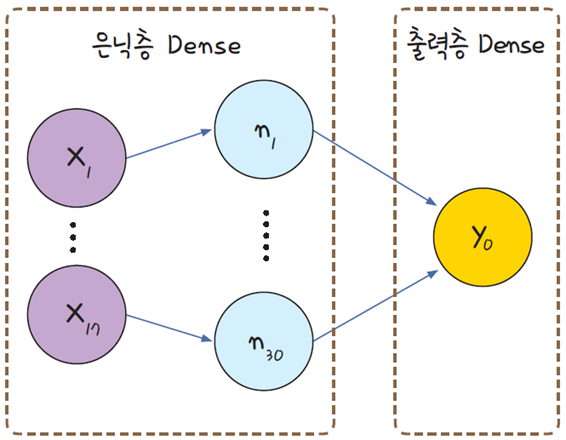

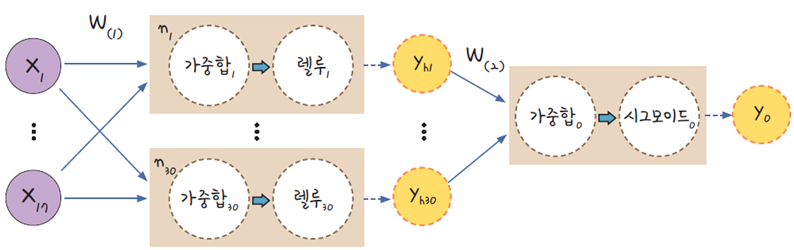

In [31]:
# (1) 딥러닝 모델 설정 : 딥러닝 구조 결정
#17개의 input 30개의 output
model2 = Sequential()
model2.add(Dense(30, activation = 'relu', input_shape = (17,))) 
# 뉴런 하나당 17개의 input 1개의 output
model2.add(Dense(1, activation = 'sigmoid'))
# 뉴런 하나당 30개의 input 1개의 output

In [32]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [33]:
model2.fit(X, Y, epochs = 100, batch_size = 10)

Epoch 1/100
47/47 [==============================] - 1s 2ms/step - loss: 4.4458 - accuracy: 0.7234
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 1.2399 - accuracy: 0.7936
Epoch 3/100
47/47 [==============================] - 0s 1ms/step - loss: 0.7962 - accuracy: 0.8362
Epoch 4/100
47/47 [==============================] - 0s 1ms/step - loss: 0.6377 - accuracy: 0.8319
Epoch 5/100
47/47 [==============================] - 0s 1ms/step - loss: 0.5349 - accuracy: 0.8340
Epoch 6/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4806 - accuracy: 0.8362
Epoch 7/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4704 - accuracy: 0.8511
Epoch 8/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.8426
Epoch 9/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.8468
Epoch 10/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4538 - accuracy: 0.8511
Epoch 11/

47/47 [==============================] - 0s 2ms/step - loss: 0.4677 - accuracy: 0.8447
Epoch 84/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.8426
Epoch 85/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4255 - accuracy: 0.8532
Epoch 86/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8532
Epoch 87/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4150 - accuracy: 0.8404
Epoch 88/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4054 - accuracy: 0.8447
Epoch 89/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.8468
Epoch 90/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.8532
Epoch 91/100
47/47 [==============================] - 0s 1ms/step - loss: 0.5078 - accuracy: 0.8277
Epoch 92/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8532
Epoch 93/100


2. 모델 컴파일  
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**Compile**  


- 앞에서 지정한 모델이 효과적으로 구현될 수 있도록
- 여러 가지 환경 설정하면서 실행가능한 상태가 되도록 만들어주는 단계
- 어떤 오차 함수를 사용할지 : loss:binary_crossentropy - log 형식을 사용하는 cost function
    - binary(두개의 결과)결과에 사용
    - 3이상이 결과에 대한 loss function은 categorical_crossentropy 사용
    - 다른 예측인경우 mean_squared_error 를 사용할 수 도 있음
- 어떤 최적화 방법을 사용할지 :optimizer:adam 
    - adam : 각 파라미터마다 다른 크기의 업데이트를 적용하는 방법이다.
- 수행 결과 평가는 어떤 방법을 사용할지 : metircs : accuracy   

를 결정

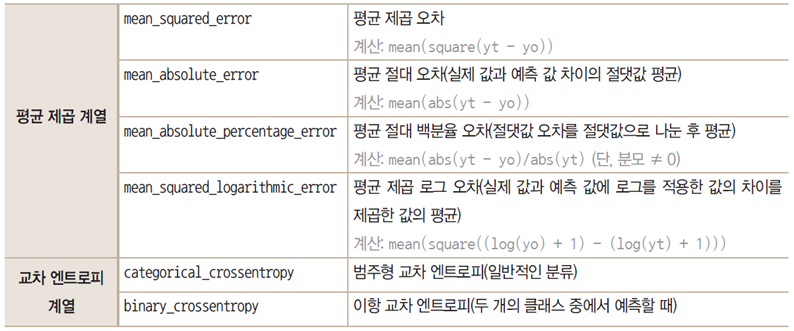

In [8]:
# (2) 모델 컴파일


3. 모델 실행 (학습)  
model.fit(X, Y, epochs=100, batch_size=10) 
fit() : 데이터 입력하면 앞에서 설정한 대로 실행되고 결과 출력

- epoch : 에포크
    - 학습 프로세스가 모든 샘플에 대해 한 번 실행하는 것
    - epoch= 100 : 각 샘플이 처음부터 끝까지 100번 재사용될 때까지 반복한다는 의미   
    
    
- batch_size
    - 샘플을 한 번에 몇 개씩 처리할 것인지 설정
    - batch_size = 10 : 전체 ~개의 샘플을 10개씩 끊어서 집어 넣으라는 의미
    - 배치 사이즈가 너무 크면 학습 속도가 느려지고, 
    - 너무 작으면 각 실행 값의 편차가 생겨서 전체 결과값이 불안정해질 수 있음
    - 사용하는 메모리가 감당할 만큼의 배치 사이즈로 설정

In [9]:
# (3) 모델 실행 (학습)

# 총 470 row - batch _size가 10 이므로 47개의 sample 그룹이 생김

Epoch 1/100
47/47 [==============================] - 0s 576us/step - loss: 0.6482 - accuracy: 0.8128
Epoch 2/100
47/47 [==============================] - 0s 529us/step - loss: 0.4890 - accuracy: 0.8468
Epoch 3/100
47/47 [==============================] - 0s 572us/step - loss: 0.4416 - accuracy: 0.8511
Epoch 4/100
47/47 [==============================] - 0s 562us/step - loss: 0.4863 - accuracy: 0.8489
Epoch 5/100
47/47 [==============================] - 0s 550us/step - loss: 0.4430 - accuracy: 0.8532
Epoch 6/100
47/47 [==============================] - 0s 500us/step - loss: 0.4303 - accuracy: 0.8532
Epoch 7/100
47/47 [==============================] - 0s 554us/step - loss: 0.4421 - accuracy: 0.8511
Epoch 8/100
47/47 [==============================] - 0s 576us/step - loss: 0.4363 - accuracy: 0.8489
Epoch 9/100
47/47 [==============================] - 0s 559us/step - loss: 0.4165 - accuracy: 0.8489
Epoch 10/100
47/47 [==============================] - 0s 562us/step - loss: 0.4317 - accura

Epoch 81/100
47/47 [==============================] - 0s 455us/step - loss: 0.4057 - accuracy: 0.8532
Epoch 82/100
47/47 [==============================] - 0s 509us/step - loss: 0.4184 - accuracy: 0.8489
Epoch 83/100
47/47 [==============================] - 0s 403us/step - loss: 0.3944 - accuracy: 0.8532
Epoch 84/100
47/47 [==============================] - 0s 456us/step - loss: 0.4345 - accuracy: 0.8468
Epoch 85/100
47/47 [==============================] - 0s 393us/step - loss: 0.4050 - accuracy: 0.8489
Epoch 86/100
47/47 [==============================] - 0s 426us/step - loss: 0.3922 - accuracy: 0.8489
Epoch 87/100
47/47 [==============================] - 0s 479us/step - loss: 0.3976 - accuracy: 0.8511
Epoch 88/100
47/47 [==============================] - 0s 428us/step - loss: 0.3966 - accuracy: 0.8468
Epoch 89/100
47/47 [==============================] - 0s 446us/step - loss: 0.3886 - accuracy: 0.8468
Epoch 90/100
47/47 [==============================] - 0s 395us/step - loss: 0.3965

In [4]:
print(hist.history['loss'])
print(hist.history['accuracy'])

### 모델 평가 추가

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
import pandas as pd

In [ ]:
# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분
tf.random.set_seed(3)

In [17]:
Data_set = pd.read_csv("data/ThoraricSurgery.csv", header=None)


X = Data_set.iloc[:, :-1]
y = Data_set.iloc[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [5]:
# (1) 딥러닝 모델 설정 : 딥러닝 구조 결정

# (2) 모델 컴파일


# (3) 모델 실행 (학습)


In [19]:
# (4) 모델 평가
print("\n Test Accuracy: %.4f" %  ))

5/5 [==============================] - 0s 750us/step - loss: 0.5457 - accuracy: 0.8298

 Test Accuracy: 0.8298


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                540       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


#### Param
- inpurt 17 * 뉴런 30 = 510 + 절편 30 = 540
- 뉴런 30 * 출력 1 = 30 + 절편 1 = 31